In [3]:
import json
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
def read_df(url, sep):
    return pd.read_csv(url, sep = ";")

In [6]:
results = read_df('./iris.csv', ';')
results

,gp_plot_data,sol_train_accuracy,sol_validation_accuracy,sol_test_accuracy,sol_nn_architecture,sol_model_name,sol_plot_data,exec_time
0,"[[\[{\\""gen_no\\"":1,\\""pop_train\\"":0.4781,\\""...",0.895238,1,0.866667,4:4:3,../results/models/iris_model_30.h5,"[{\epoch\"":1,\""value\"":1.9195,\""metric\"":\""los...",2.956086


-------------------------------------------------------------------------
----------- STARTING 0 SOLUTION RESULTS VISUALIZATION -----------
-------------------------------------------------------------------------
1. NEURAL NETWORK ARCHITECTURE: 4:4:3
2. ACCURACY OVER THE TRAIN DATA: 0.895238095805759
3. ACCURACY OVER THE VALIDATION DATA: 1
4. ACCURACY OVER THE TEST DATA: 0.866666674613953
5. EXECUTION TIME (IN MINUTES) 2.95608640114466
6. EVOLUTION OF THE POPULATION (population accuracy vs best accuracy)


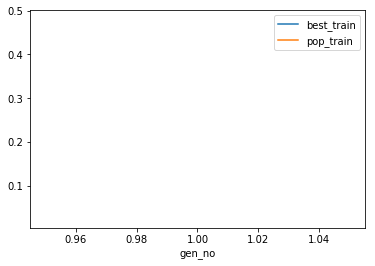

7. EVOLUTION OF THE ACCURACY OF THE SOLUTION


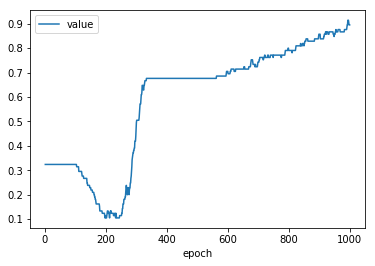

8. EVOLUTION OF THE LOSS OF THE SOLUTION


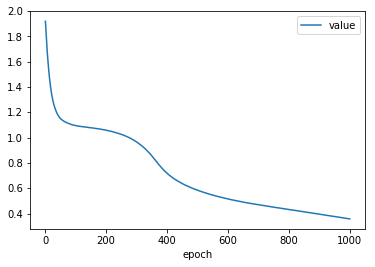

In [7]:
for index, row in results.iterrows():
    print("-------------------------------------------------------------------------")
    print("----------- STARTING", index, "SOLUTION RESULTS VISUALIZATION -----------")
    print("-------------------------------------------------------------------------")
    print("1. NEURAL NETWORK ARCHITECTURE:", row["sol_nn_architecture"])
    print("2. ACCURACY OVER THE TRAIN DATA:", row["sol_train_accuracy"])
    print("3. ACCURACY OVER THE VALIDATION DATA:", row["sol_validation_accuracy"])
    print("4. ACCURACY OVER THE TEST DATA:", row["sol_test_accuracy"])
    print("5. EXECUTION TIME (IN MINUTES)", row["exec_time"])
    print("6. EVOLUTION OF THE POPULATION (population accuracy vs best accuracy)")
    json_o = "[" + row["gp_plot_data"].replace("\\", "").replace("[", "").replace("]", "").replace("}\"", "}").replace("\"{", "{")[:-1] + "]"
    gp_plot_data = pd.DataFrame.from_records(json.loads(json_o), index = "gen_no")
    gp_plot_data.plot()
    plt.show()
    print("7. EVOLUTION OF THE ACCURACY OF THE SOLUTION")
    json_o = row["sol_plot_data"].replace("\\", "").replace("epoch", "\"epoch", 1)[:-1]
    sol_plot_data = json.loads(json_o)
    sol_plot_data_a = pd.DataFrame.from_records([x for x in sol_plot_data if x["metric"] == "acc"], index = "epoch")
    sol_plot_data_e = pd.DataFrame.from_records([x for x in sol_plot_data if x["metric"] == "loss"], index = "epoch")
    sol_plot_data_a.plot()
    plt.show()
    print("8. EVOLUTION OF THE LOSS OF THE SOLUTION")
    sol_plot_data_e.plot()
    plt.show()